In [8]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 


In [3]:
df = pd.read_csv("browser_rankings_data.csv")

In [4]:
df

,ID,Keyword,Rank,Country,Language,Date,App ID,Date of Last Description Change,Short Description,Long Description
0,1,browser,2.0,in,en,16-12-2020,net.fast.web.browser,18-12-2020,"The small, fastest, secure Web Browser, best m...","One of the smallest, fastest, secure Web Brows..."
1,2,browser,3.0,in,en,16-12-2020,com.android.chrome,18-12-2020,"Fast, simple, and secure. Google Chrome browse...","Google Chrome is a fast, easy to use, and secu..."
2,3,browser,4.0,in,en,16-12-2020,com.opera.browser,27-02-2021,"Fast, safe web browser: free VPN, Ad blocker, ...","Fast, safe and private, introducing the latest..."
3,3,browser,4.0,in,en,16-12-2020,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
4,4,browser,1.0,in,en,16-12-2020,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
...,...,...,...,...,...,...,...,...,...,...
3061,131575,android browser,7.0,in,en,06-03-2021,com.opera.browser,18-12-2020,"Fast, safe web browser: free VPN, Ad blocker, ...","Opera is a fast, safe web browser for your And..."
3062,131576,android browser,5.0,in,en,06-03-2021,com.cloudmosa.puffinTV,07-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3063,131576,android browser,5.0,in,en,06-03-2021,com.cloudmosa.puffinTV,06-02-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...
3064,131576,android browser,5.0,in,en,06-03-2021,com.cloudmosa.puffinTV,21-01-2021,Puffin TV Browser - One App to Watch All Video...,Puffin TV Browser is a special edition of Puff...


In [5]:
df.columns

Index(['ID', 'Keyword', 'Rank', 'Country', 'Language', 'Date', 'App ID',
       'Date of Last Description Change', 'Short Description',
       'Long Description'],
      dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of           ID          Keyword  Rank Country Language        Date  \
0          1          browser   2.0      in       en  16-12-2020   
1          2          browser   3.0      in       en  16-12-2020   
2          3          browser   4.0      in       en  16-12-2020   
3          3          browser   4.0      in       en  16-12-2020   
4          4          browser   1.0      in       en  16-12-2020   
...      ...              ...   ...     ...      ...         ...   
3061  131575  android browser   7.0      in       en  06-03-2021   
3062  131576  android browser   5.0      in       en  06-03-2021   
3063  131576  android browser   5.0      in       en  06-03-2021   
3064  131576  android browser   5.0      in       en  06-03-2021   
3065  131576  android browser   5.0      in       en  06-03-2021   

                      App ID Date of Last Description Change  \
0       net.fast.web.browser                      18-12-2020   
1         com.android

In [16]:
df['Rank'].describe()

count    3050.000000
mean       15.155738
std        24.268403
min         1.000000
25%         2.000000
50%         5.000000
75%        16.000000
max       134.000000
Name: Rank, dtype: float64

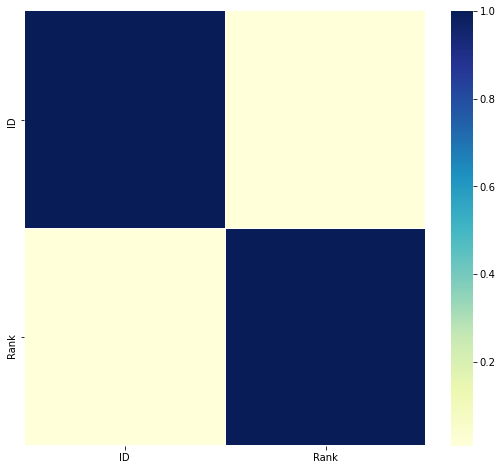

In [12]:
corrmat = df.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 


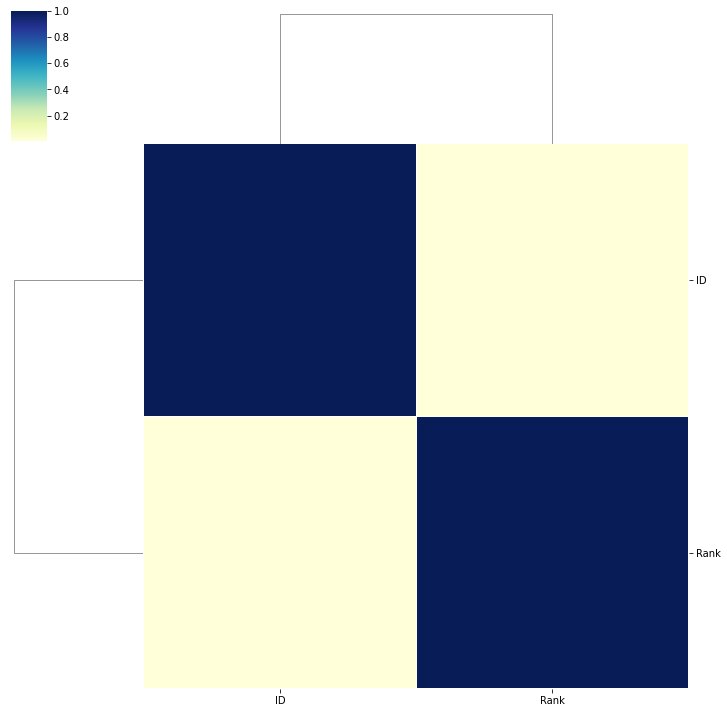

In [13]:
corrmat = df.corr() 

cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 

cg 


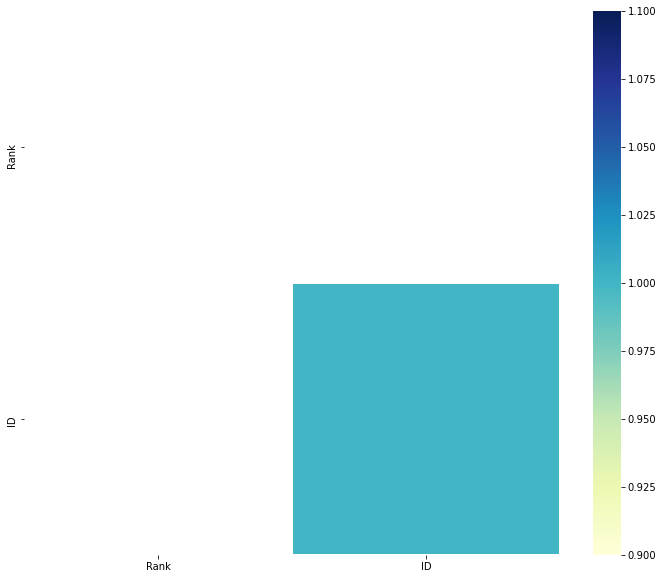

In [15]:
# rank correlation matrix 
# k : number of variables for heatmap 
k = 15 
  
cols = corrmat.nlargest(k, 'Rank')['Rank'].index 
  
cm = np.corrcoef(df[cols].values.T) 
f, ax = plt.subplots(figsize =(12, 10)) 
  
sns.heatmap(cm, ax = ax, cmap ="YlGnBu", 
            linewidths = 0.1, yticklabels = cols.values,  
                              xticklabels = cols.values) 